In [18]:
import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [3]:
with np.load('data/train_and_test.npz') as data:
    X_test = data['X_test']
    y_train = data['y_train']
    X_train = data['X_train']

Using TensorFlow backend.


(39209, 32, 32, 3)

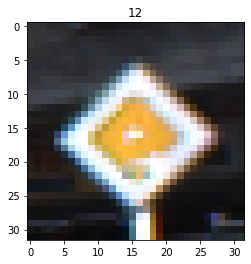

In [4]:
plt.imshow(X_train[20000])
plt.title(y_train[20000])
X_train.shape

In [19]:
cnn = Sequential()

cnn.add(Conv2D(filters=32,
               kernel_size=(2,2),
               strides=(1,1),
               padding='same',
               input_shape=(32, 32, 3),
               data_format='channels_last'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Dropout(0.4))

cnn.add(Conv2D(filters=64,
               kernel_size=(2,2),
               strides=(1,1),
               padding='valid'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Flatten())
cnn.add(Dense(64))
cnn.add(Activation('relu'))

cnn.add(Dropout(0.4))

cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))

cnn.compile(loss = 'binary_crossentropy',
            optimizer = 'rmsprop', metrics = ['accuracy'])


In [20]:
cnn.fit(X_train, y_train)

Epoch 1/1
39209/39209 [==============================] - 21s 541us/step - loss: -160567819718.9144 - accuracy: 0.0566

In [21]:
result = cnn.predict(X_train)

In [22]:
result

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)